# Evolution of maximum radial velocity in the convection zone

In [1]:
%pylab 

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import nugridpy.utils as utils
from ppmpy import ppm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

def get_vr_max_evolution(prof, cycles, r1, r2):
    r = prof.get('Y', fname = cycles[0], resolution = 'l')
    idx1 = np.argmin(np.abs(r - r1))
    idx2 = np.argmin(np.abs(r - r2))

    t = np.zeros(len(cycles))
    vr_max = np.zeros(len(cycles))
    for k in range(len(cycles)):
        t[k] = prof.get('t', fname = cycles[k], resolution = 'l')[-1]
        vr_rms  = prof.get('EkY', fname = cycles[k], resolution = 'l')**0.5
        vr_max[k] = np.max(vr_rms[idx2:idx1])
    
    return t, vr_max

In [3]:
data_dir='/data/ppm_rpod2/YProfiles/O-shell-M25/'

Reading attributes from file  YProfile-01-0348.bobaaa
Analyzing headers ...
There are 349 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D1 directory.
Ndump values range from 0 to 348
Time values range from 0.0 to 3480.0


<IPython.core.display.Javascript object>


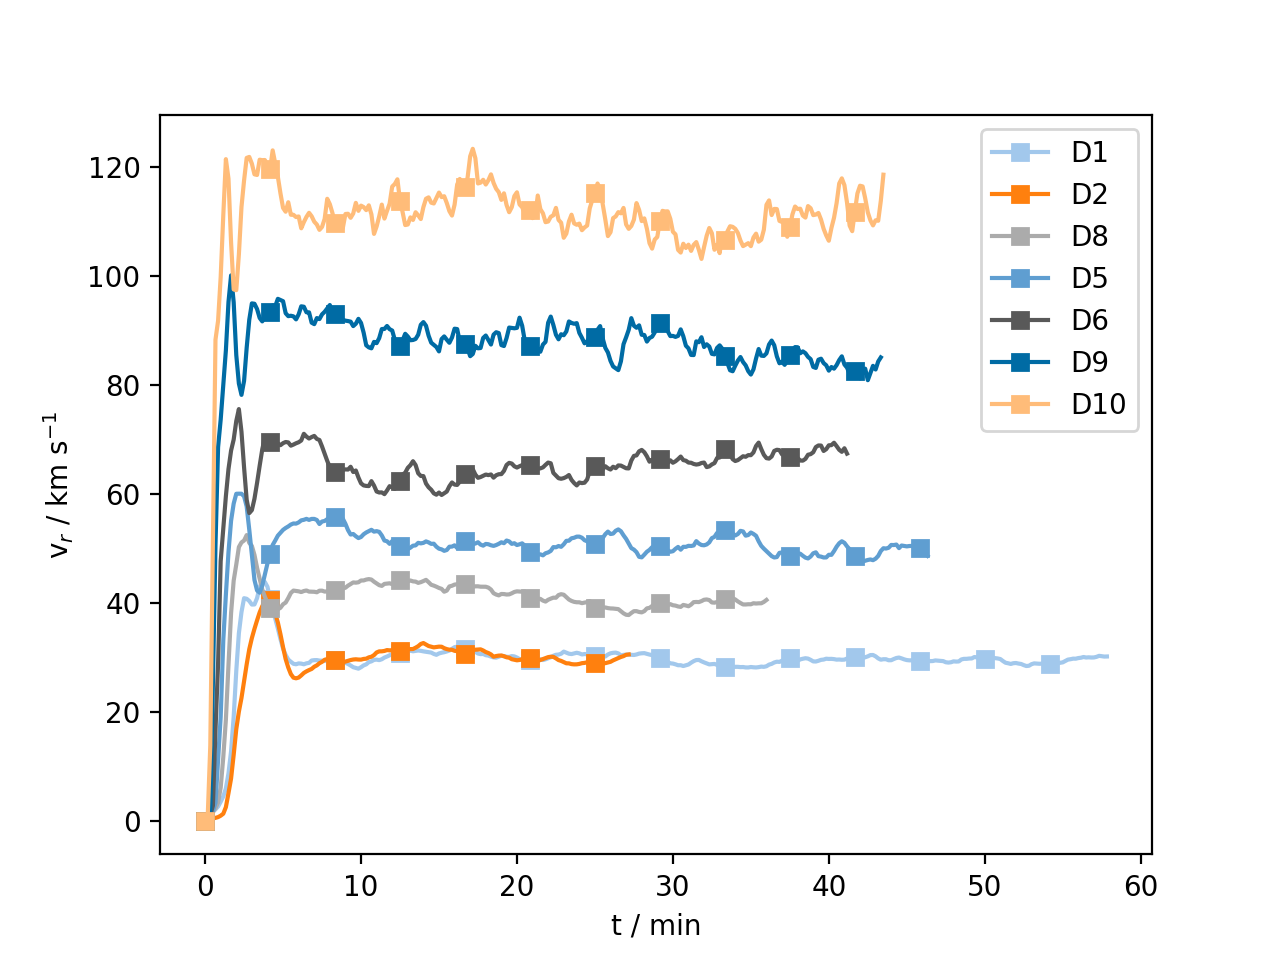

Reading attributes from file  YProfile-01-0163.bobaaa
Analyzing headers ...
There are 164 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D2 directory.
Ndump values range from 0 to 163
Time values range from 0.0 to 1640.0
Reading attributes from file  YProfile-01-0217.bobaaa
Analyzing headers ...
There are 218 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D8 directory.
Ndump values range from 0 to 217
Time values range from 0.0 to 2170.0
Reading attributes from file  YProfile-01-0279.bobaaa
Analyzing headers ...
There are 280 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D5 directory.
Ndump values range from 0 to 279
Time values range from 0.0 to 2790.0
Reading attributes from file  YProfile-01-0248.bobaaa
Analyzing headers ...
There are 249 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D6 directory.
Ndump values range from 0 to 248
Time values range from 0.0 to 2480.0
Reading attributes from file  YProfile-01-0261.bobaaa
Analyzing 

In [4]:
sparse = 1
markevery = 25
Ymin=4.; Ymax=8.
cb = utils.colourblind
cases = ['D1','D2','D8','D5','D6','D9','D10']
yy = 0
for case in cases:
    prof = ppm.yprofile(data_dir+case)
    cycles = range(prof.cycles[0], prof.cycles[-1], sparse)
    t, vr_max = get_vr_max_evolution(prof, cycles, Ymin, Ymax)
    plt.plot(t/60.,  1e3*vr_max,  color = cb(yy),\
             marker = 's', markevery = markevery, label = case)
    yy += 1
    
plt.title('')
plt.xlabel('t / min')
plt.ylabel(r'v$_r$ / km s$^{-1}$')
plt.legend(loc = 0)